<a href="https://colab.research.google.com/github/pingkivila/DigitalSkola_DataScience11/blob/main/Database_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Database Programming**

created by Pingki Vila Tri Wahyuni


This notebook is created to teach student about database programming. All the code is free to reuse by everyone.

**Contents**
1. Text file in python
  - Writing text file
  - Reading text file
  - Appending text file
3. Connect database postgre in Python
4. Query and exercise in Python
5. Homework

___

In [ ]:
#import library
import psycopg2
import pandas as pd
from openpyxl import Workbook, load_workbook

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


## Text File in Python

### Writing text

In [ ]:
# Writing text in python
with open('untitled.txt', 'w') as writer:
  writer.write('Welcome back to my channel')

In [ ]:
with open('untitled.txt', 'r') as reader:
    print(reader.readlines())

['Welcome back to my channel']


### Reading and Appending text in python

In [ ]:
path = "/content/drive/MyDrive/Data Ari Gmail/Data_Ari/Data_Science/Digital Skola/Indonesia Version/Database Programming/saham.txt"

In [ ]:
text_file = open(path)
text_file

<_io.TextIOWrapper name='/content/drive/MyDrive/Data Ari Gmail/Data_Ari/Data_Science/Digital Skola/Indonesia Version/Database Programming/saham.txt' mode='r' encoding='UTF-8'>

In [ ]:
# reading all text in file text
with open(path, 'r') as text_file:
  print(text_file.readlines())

['Saham (stock) merupakan salah satu instrumen pasar keuangan yang paling popular. Menerbitkan saham merupakan salah satu pilihan perusahaan ketika memutuskan untuk pendanaan perusahaan. Pada sisi yang lain, saham merupakan instrument investasi yang banyak dipilih para investor karena saham mampu memberikan tingkat keuntungan yang menarik.\n', '\n', 'Saham dapat didefinisikan sebagai tanda penyertaan modal seseorang atau pihak (badan usaha) dalam suatu perusahaan atau perseroan terbatas. Dengan menyertakan modal tersebut, maka pihak tersebut memiliki klaim atas pendapatan perusahaan, klaim atas asset perusahaan, dan berhak hadir dalam Rapat Umum Pemegang Saham (RUPS)\n', 'Digital Skola Batch 11\n', 'I will work as a data professional\n', 'Digital Skola Batch 11']


In [ ]:
# reading file and separate each line by add end = ""
with open(path, 'r') as text_file:
  for line in text_file:
    print(line, end="") 

Saham (stock) merupakan salah satu instrumen pasar keuangan yang paling popular. Menerbitkan saham merupakan salah satu pilihan perusahaan ketika memutuskan untuk pendanaan perusahaan. Pada sisi yang lain, saham merupakan instrument investasi yang banyak dipilih para investor karena saham mampu memberikan tingkat keuntungan yang menarik.

Saham dapat didefinisikan sebagai tanda penyertaan modal seseorang atau pihak (badan usaha) dalam suatu perusahaan atau perseroan terbatas. Dengan menyertakan modal tersebut, maka pihak tersebut memiliki klaim atas pendapatan perusahaan, klaim atas asset perusahaan, dan berhak hadir dalam Rapat Umum Pemegang Saham (RUPS)
Digital Skola Batch 11
I will work as a data professional
Digital Skola Batch 11

In [ ]:
# appending text into the existing file
with open(path, 'a') as text_file:
  text_file.write("\nDigital Skola Batch 11")

In [ ]:
# show the result
with open(path, 'r') as text_file:
  for line in text_file:
    print(line, end="") 

Saham (stock) merupakan salah satu instrumen pasar keuangan yang paling popular. Menerbitkan saham merupakan salah satu pilihan perusahaan ketika memutuskan untuk pendanaan perusahaan. Pada sisi yang lain, saham merupakan instrument investasi yang banyak dipilih para investor karena saham mampu memberikan tingkat keuntungan yang menarik.

Saham dapat didefinisikan sebagai tanda penyertaan modal seseorang atau pihak (badan usaha) dalam suatu perusahaan atau perseroan terbatas. Dengan menyertakan modal tersebut, maka pihak tersebut memiliki klaim atas pendapatan perusahaan, klaim atas asset perusahaan, dan berhak hadir dalam Rapat Umum Pemegang Saham (RUPS)
Digital Skola Batch 11
I will work as a data professional
Digital Skola Batch 11
Digital Skola Batch 11

## Connect SQL in Python

In [ ]:
conn = psycopg2.connect(
          host = "digitalskoladb.c04me33o8tni.ap-southeast-1.rds.amazonaws.com",
          database = "sandbox",
          user = "adminDigital",
          password = "ABjEKEMzG9eEHN2QWRatWBUX")

In [ ]:
cur = conn.cursor()

In [ ]:
sql = """SELECT * FROM batch_11.cb_stations"""
station = pd.read_sql_query(sql, conn)
station.head()

,station_id,name,short_name,latitude,longitude,region_id,rental_methods,capacity,eightd_has_key_dispenser,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_installed,is_renting,is_returning,eightd_has_available_keys,last_reported
0,128,MacDougal St & Prince St,5687.04,40.727104,-74.002970,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
1,224,Spruce St & Nassau St,5137.10,40.711464,-74.005520,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,True,True,True,False,1970-01-01
2,229,Great Jones St,5636.11,40.727436,-73.993790,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
3,410,Suffolk St & Stanton St,5445.02,40.720665,-73.985176,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
4,434,9 Ave & W 18 St,6190.08,40.743176,-74.003660,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01


In [ ]:
sql = """WITH TABS AS
              (SELECT *
               FROM batch_11.cb_trips
               where gender = 0 and tripduration = 634)
               
         SELECT *
         from TABS"""
data = pd.read_sql_query(sql, conn)
data.head()

,tripduration,starttime,stoptime,start station id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,634,2013-07-04 13:55:26,2013-07-04 14:06:00,293,Lafayette St & E 8 St,40.730287,-73.990765,233,Joralemon St & Adams St,40.692463,-73.989639,16510,Customer,N,0
1,634,2013-07-04 14:02:00,2013-07-04 14:12:34,510,W 51 St & 6 Ave,40.760660,-73.980420,318,E 43 St & Vanderbilt Ave,40.753202,-73.977987,14543,Customer,N,0
2,634,2013-07-04 16:01:16,2013-07-04 16:11:50,521,8 Ave & W 31 St,40.750450,-73.994811,404,9 Ave & W 14 St,40.740583,-74.005509,17895,Customer,N,0
3,634,2013-07-04 17:36:39,2013-07-04 17:47:13,168,W 18 St & 6 Ave,40.739713,-73.994564,476,E 31 St & 3 Ave,40.743943,-73.979661,18816,Customer,N,0
4,634,2013-07-05 08:17:55,2013-07-05 08:28:29,303,Mercer St & Spring St,40.723627,-73.999496,301,E 2 St & Avenue B,40.722174,-73.983688,15040,Customer,N,0


In [ ]:
sql = """WITH TABS AS
              (SELECT b.tripduration, a.name as station_name, b.starttime
               FROM batch_11.cb_stations as a
               JOIN batch_11.cb_trips as b
               on a.station_id = b.end_station_id)
               
         SELECT station_name, sum(tripduration) as total_trip_duration
         from TABS
         where station_name like '%Clermont%'
         group by 1
         having sum(tripduration) < 3000000
         """
data2 = pd.read_sql_query(sql, conn)
data2.head(7)

,station_name,total_trip_duration
0,Clermont Ave & Lafayette Ave,760813
1,Clermont Ave & Park Ave,332556
2,Fulton St & Clermont Ave,860286


In [ ]:
# How many start_station used the most? sort in descending
data_start_sta = data['start_station_name'].value_counts().rename_axis('Start_Station').reset_index(name='counts')

data_start_sta.head()

,Start_Station,counts
0,8 Ave & W 31 St,4
1,1 Ave & E 18 St,3
2,W 20 St & 11 Ave,3
3,West Thames St,3
4,Cleveland Pl & Spring St,3


In [ ]:
data_start_sta.shape

(88, 2)

In [ ]:
sql = """WITH TABS AS
              (SELECT *
               FROM batch_11.cb_trips
               where lower(end_station_name) like '%broadway%' and tripduration <= 500)
               
         SELECT *
         from TABS"""
data3 = pd.read_sql_query(sql, conn)
data3.head()

,tripduration,starttime,stoptime,start station id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,491,2013-07-03 20:47:16,2013-07-03 20:55:27,367,E 53 St & Lexington Ave,40.758281,-73.970694,533,Broadway & W 39 St,40.752996,-73.987216,15651,Subscriber,1974,1
1,157,2013-07-03 20:49:51,2013-07-03 20:52:28,386,Centre St & Worth St,40.714948,-74.002345,330,Reade St & Broadway,40.714505,-74.005628,17861,Subscriber,1995,1
2,453,2013-07-03 20:56:00,2013-07-03 21:03:33,444,Broadway & W 24 St,40.742354,-73.989151,497,E 17 St & Broadway,40.737050,-73.990093,20173,Subscriber,1965,1
3,240,2013-07-03 20:57:57,2013-07-03 21:01:57,297,E 15 St & 3 Ave,40.734232,-73.986923,497,E 17 St & Broadway,40.737050,-73.990093,16374,Subscriber,1982,1
4,212,2013-07-03 20:58:25,2013-07-03 21:01:57,297,E 15 St & 3 Ave,40.734232,-73.986923,497,E 17 St & Broadway,40.737050,-73.990093,18249,Subscriber,1985,2


In [ ]:
# Show the proportion of usertype
exercise2 = data3['usertype'].value_counts().rename_axis('usertype').reset_index(name='counts')

fig = px.pie(exercise2, values='counts', names='usertype')
fig.show()

In [ ]:
sql_script =  """
              select *
              from batch_11.cb_trips ct
              where ct.gender = 0 and ct.tripduration = 634
              """

data_challenge_1 = pd.read_sql_query(sql_script, conn)
data_challenge_1.head()

station = data_challenge_1['start_station_name'].value_counts()

df_station = pd.DataFrame(station)
df_station.reset_index(inplace=True)
df_station.rename(columns={'index':'start_station', 'start_station_name':'total'}, inplace=True)
df_station

,start_station,total
0,8 Ave & W 31 St,4
1,St Marks Pl & 2 Ave,3
2,W 20 St & 11 Ave,3
3,West Thames St,3
4,E 40 St & 5 Ave,3
...,...,...
83,9 Ave & W 14 St,1
84,Washington Square E,1
85,E 5 St & Avenue C,1
86,Harrison St & Hudson St,1


## Homework



* 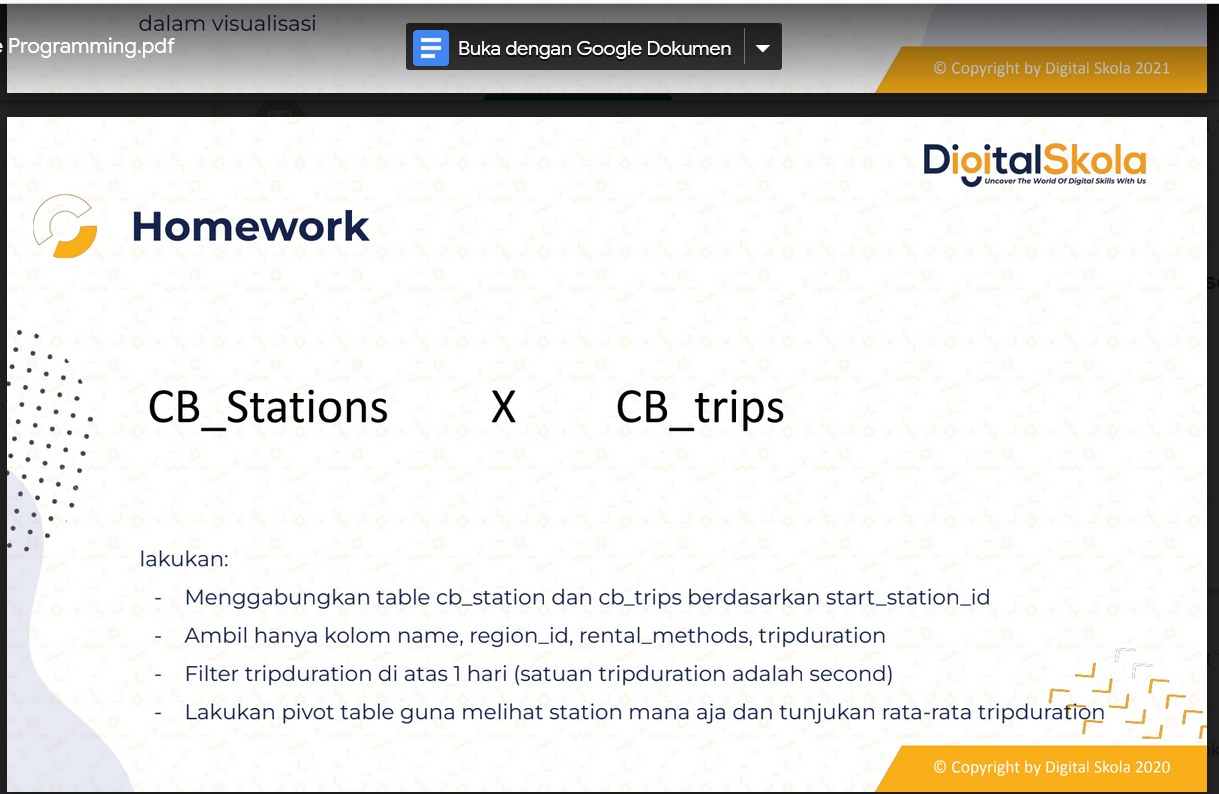
* 



In [ ]:
!pip install psycopg2

In [ ]:
import psycopg2
import pandas as pd
import numpy as np

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
conn = psycopg2.connect(
    host = "digitalskoladb.c04me33o8tni.ap-southeast-1.rds.amazonaws.com",
    database = "sandbox",
    user = "ds11_4",
    password = "ds11_4"
)

In [ ]:
cur = conn.cursor()

In [ ]:
sql = """select * from batch_11.cb_stations"""
cur.execute(sql)

In [ ]:
cur.fetchone()

(128,
 'MacDougal St & Prince St',
 '5687.04',
 40.727104,
 -74.00297,
 71,
 'CREDITCARD,KEY',
 0,
 False,
 0,
 0,
 0,
 0,
 False,
 False,
 False,
 False,
 datetime.datetime(1970, 1, 1, 0, 0))

In [ ]:
sql = """
      select * from batch_11.cb_stations
      """
data_cs = pd.read_sql_query(sql, conn)
data_cs.head()


,station_id,name,short_name,latitude,longitude,region_id,rental_methods,capacity,eightd_has_key_dispenser,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_installed,is_renting,is_returning,eightd_has_available_keys,last_reported
0,128,MacDougal St & Prince St,5687.04,40.727104,-74.002970,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
1,224,Spruce St & Nassau St,5137.10,40.711464,-74.005520,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,True,True,True,False,1970-01-01
2,229,Great Jones St,5636.11,40.727436,-73.993790,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
3,410,Suffolk St & Stanton St,5445.02,40.720665,-73.985176,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
4,434,9 Ave & W 18 St,6190.08,40.743176,-74.003660,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01


In [ ]:
# Menggabungkan table cb_station dan cb_trips berdasarkan start_station_id

sql = """
      
      with one as 
            (select *
            from batch_11.cb_stations cs
            join batch_11.cb_trips ct
            on cs.station_id = ct."start station id")
      
      select *
      from one

      
      """

data_gab = pd.read_sql_query(sql, conn)
data_gab.head()

,station_id,name,short_name,latitude,longitude,region_id,rental_methods,capacity,eightd_has_key_dispenser,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_installed,is_renting,is_returning,eightd_has_available_keys,last_reported,tripduration,starttime,stoptime,start station id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,368,Carmine St & 6 Ave,5763.03,40.730385,-74.00215,71,"CREDITCARD,KEY",47,False,42,2,3,0,True,True,True,False,2021-11-09,578,2013-07-03 20:45:06,2013-07-03 20:54:44,368,Carmine St & 6 Ave,40.730386,-74.002150,151,Cleveland Pl & Spring St,40.721816,-73.997203,15807,Subscriber,1982,2
1,507,E 25 St & 2 Ave,6046.02,40.739124,-73.97974,71,"CREDITCARD,KEY",79,False,74,0,5,0,True,True,True,False,2021-11-09,429,2013-07-03 20:45:37,2013-07-03 20:52:46,507,E 25 St & 2 Ave,40.739126,-73.979738,528,2 Ave & E 31 St,40.742909,-73.977061,19201,Subscriber,1985,1
2,368,Carmine St & 6 Ave,5763.03,40.730385,-74.00215,71,"CREDITCARD,KEY",47,False,42,2,3,0,True,True,True,False,2021-11-09,973,2013-07-03 20:46:10,2013-07-03 21:02:23,368,Carmine St & 6 Ave,40.730386,-74.002150,545,E 23 St & 1 Ave,40.736502,-73.978095,17996,Subscriber,1977,2
3,461,E 20 St & 2 Ave,5971.08,40.735878,-73.98205,71,"CREDITCARD,KEY",56,False,46,3,7,0,True,True,True,False,2021-11-09,496,2013-07-03 20:46:12,2013-07-03 20:54:28,461,E 20 St & 2 Ave,40.735877,-73.982050,435,W 21 St & 6 Ave,40.741740,-73.994156,20513,Subscriber,1981,1
4,229,Great Jones St,5636.11,40.727436,-73.99379,71,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01,1769,2013-07-03 20:46:19,2013-07-03 21:15:48,229,Great Jones St,40.727434,-73.993790,480,W 53 St & 10 Ave,40.766697,-73.990617,17300,Subscriber,1966,2


In [ ]:
# Ambil hanya kolom name, region_id, rental_methods, tripduration
# Filter tripduration di atas 1 hari (satuan tripduration adalah second), (satu hari ada 86400 second)

sql = """
      
      with one as 
            (select cs.name as station_name, cs.region_id, cs.rental_methods, ct.tripduration
            from batch_11.cb_stations cs
            join batch_11.cb_trips ct
            on cs.station_id = ct."start station id")
            
      select station_name, tripduration
      from one
      where one.tripduration > 86400
      order by one.tripduration asc

      
      """

data_filter = pd.read_sql_query(sql, conn)
data_filter.head(10)

,station_name,tripduration
0,State St & Smith St (old),88182
1,Rivington St & Chrystie St,88411
2,Broadway & Berry St,88516
3,Broadway & Berry St,88516
4,W 34 St & 11 Ave,90965
5,W 52 St & 11 Ave,91003
6,E 12 St & 3 Ave,93452
7,Carmine St & 6 Ave,94989
8,Clermont Ave & Lafayette Ave,97014
9,Allen St & Hester St,100715


In [ ]:
# Lakukan pivot table guna melihat station mana aja dan tunjukan rata-rata tripduration

pd.pivot_table(data_filter, values="tripduration", index =['station_name'],aggfunc=np.mean)

,tripduration
station_name,
Allen St & Hester St,100715.0
Broadway & Berry St,88516.0
Broadway & W 56 St,104368.0
Broadway & W 58 St,259428.5
Carmine St & 6 Ave,94989.0
Centre St & Chambers St,207708.0
Clermont Ave & Lafayette Ave,97014.0
Cleveland Pl & Spring St,6250750.0
E 12 St & 3 Ave,93452.0


In [ ]:
sql = """WITH TABS AS
              (SELECT a.region_id, a.rental_methods, b.tripduration, a.name as station_name
               FROM batch_11.cb_stations as a
               JOIN batch_11.cb_trips as b
               on a.station_id = b.end_station_id)
               
         SELECT *
         from TABS
         where tripduration > 86400
         """
data4 = pd.read_sql_query(sql, conn)
data4.head(7)

,region_id,rental_methods,tripduration,station_name
0,71,"CREDITCARD,KEY",118257,Kent Ave & S 11 St
1,71,"CREDITCARD,KEY",159004,Fulton St & Clermont Ave
2,71,"CREDITCARD,KEY",6250750,FDR Drive & E 35 St
3,71,"CREDITCARD,KEY",93452,Forsyth St & Canal St
4,71,"CREDITCARD,KEY",90965,Leonard St & Church St
5,71,"CREDITCARD,KEY",601177,Willoughby Ave & Walworth St
6,71,"CREDITCARD,KEY",332510,W 42 St & 8 Ave


In [ ]:
pd.pivot_table(data4, values='tripduration', index=['rental_methods','station_name'], 
               columns='region_id', aggfunc='mean')

region_id                                           71
rental_methods station_name                           
CREDITCARD,KEY 12 Ave & W 40 St                97014.0
               8 Ave & W 33 St                217948.0
               9 Ave & W 45 St                350865.0
               Atlantic Ave & Furman St       120336.0
               Bedford Ave & S 9 St            99181.0
               Broadway & W 56 St              88411.0
               Broadway & W 58 St             167992.0
               Columbia St & Rivington St     145506.0
               E 3 St & 1 Ave                 100848.0
               FDR Drive & E 35 St           6250750.0
               Forsyth St & Canal St           93452.0
               Franklin Ave & Myrtle Ave      409415.0
               Fulton St & Clermont Ave       159004.0
               Hancock St & Bedford Ave       102653.5
               Kent Ave & S 11 St             118257.0
               Lafayette St & E 8 St          124456.0
               Lawrence St & Willoughby St    113089.0
               Leonard St & Church St          90965.0
               Old Fulton St                  730955.0
               S 5 Pl & S 5 St                109207.0
               W 17 St & 8 Ave                 88057.0
               W 42 St & 8 Ave                332510.0
               W 44 St & 5 Ave                104368.0
               Willoughby Ave & Walworth St   601177.0